# 数据EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv("origin-data/train.csv")
train_df

,category,query1,query2,label
0,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血是什么原因？,1.0
1,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后为什么会咯血？,1.0
2,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，应该怎么处理？,0.0
3,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，需要就医吗？,0.0
4,咳血,"剧烈运动后咯血,是怎么了?",剧烈运动后咯血，是否很严重？,0.0
...,...,...,...,...
8748,哮喘,过敏性哮喘吃什么药管用,过敏性哮喘吃什么药有效果？,1.0
8749,哮喘,过敏性哮喘吃什么药管用,过敏性哮喘吃什么药效果好的快？,1.0
8750,哮喘,过敏性哮喘吃什么药管用,过敏性哮喘吃什么水果好？,0.0
8751,哮喘,过敏性哮喘吃什么药管用,过敏性哮喘能治好吗？,0.0


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  8753 non-null   object 
 1   query1    8753 non-null   object 
 2   query2    8753 non-null   object 
 3   label     8747 non-null   float64
dtypes: float64(1), object(3)
memory usage: 273.7+ KB


In [3]:
len(train_df)

8753

In [4]:
from sklearn.preprocessing import OneHotEncoder
tt = OneHotEncoder().fit_transform(train_df["category"].values.reshape(-1, 1)).toarray()
tt[0]

array([0., 1., 0., 0., 0., 0., 0., 0.])

## 统计query长度的分布

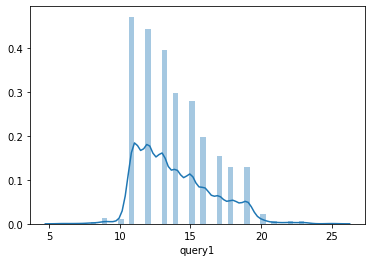

In [5]:
sns.distplot(train_df["query1"].map(lambda x : len(x)))

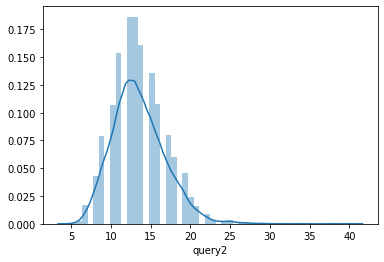

In [6]:
sns.distplot(train_df["query2"].map(lambda x : len(x)))

In [7]:
np.percentile(train_df["query2"].map(lambda x : len(x)),100)

40.0

In [8]:
train_df["query1"].values

array(['剧烈运动后咯血,是怎么了?', '剧烈运动后咯血,是怎么了?', '剧烈运动后咯血,是怎么了?', ...,
       '过敏性哮喘吃什么药管用', '过敏性哮喘吃什么药管用', '过敏性哮喘吃什么药管用'], dtype=object)

## 正例负例还算均匀

In [9]:
train_df['label'].value_counts()

0.0    5250
1.0    3497
Name: label, dtype: int64

## 不同问题类别分布比例

In [10]:
train_df["category"].value_counts()

感冒        1921
上呼吸道感染    1597
肺炎        1475
肺气肿        980
哮喘         875
胸膜炎        795
支原体肺炎      790
咳血         320
Name: category, dtype: int64

In [11]:
label_nan_df = train_df.loc[(train_df["label"]!=1) & (train_df["label"]!=0),:]
label_nan_df

,category,query1,query2,label
350,支原体肺炎,小儿支原体肺炎怎样能彻底治愈,小儿支原体肺炎如何根治？,NaN
351,支原体肺炎,小儿支原体肺炎怎样能彻底治愈,小儿支原体肺炎怎样可以彻底治好？,NaN
352,支原体肺炎,小儿支原体肺炎怎样能彻底治愈,小孩支原体肺炎多久能痊愈？,NaN
353,支原体肺炎,小儿支原体肺炎怎样能彻底治愈,如何诊断小儿支原体肺炎？,NaN
354,支原体肺炎,小儿支原体肺炎怎样能彻底治愈,小儿支原体肺炎有哪些病症？,NaN
8052,哮喘,请问，怎么可以治疗哮喘病,哮喘病发吃什么有效？,NaN


In [12]:
label_nan_df.index

Int64Index([350, 351, 352, 353, 354, 8052], dtype='int64')

## 删除label为nan的数据

In [13]:
train_df = train_df.drop(index=label_nan_df.index,axis=0)
train_df["label"] = train_df["label"].map(lambda x :int(x))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 0 to 8752
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  8747 non-null   object
 1   query1    8747 non-null   object
 2   query2    8747 non-null   object
 3   label     8747 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 341.7+ KB


# 切分dev一部分出来作为test

In [14]:
dev_df = pd.read_csv("origin-data/dev.csv")
dev_df

,category,query1,query2,label
0,咳血,请问呕血与咯血有什么区别？,请问呕血与咯血这两者之间有什么区别？,1
1,咳血,请问呕血与咯血有什么区别？,请问呕血与咯血异同？,1
2,咳血,请问呕血与咯血有什么区别？,请问呕血与咯血怎么治疗？,0
3,咳血,请问呕血与咯血有什么区别？,请问呕血与咯血是什么原因导致的？,0
4,咳血,请问呕血与咯血有什么区别？,请问呕血与咯血与其他疾病有关联吗？,0
...,...,...,...,...
1997,哮喘,变应性哮喘就是过敏性哮喘吗？,变应性哮喘与过敏性哮喘一样吗？,1
1998,哮喘,变应性哮喘就是过敏性哮喘吗？,变应性哮喘是否就是过敏性哮喘？,1
1999,哮喘,变应性哮喘就是过敏性哮喘吗？,变应性哮喘的饮食禁忌有哪些？,0
2000,哮喘,变应性哮喘就是过敏性哮喘吗？,变应性哮喘怎么治疗？,0


In [15]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2002 non-null   object
 1   query1    2002 non-null   object
 2   query2    2002 non-null   object
 3   label     2002 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 62.7+ KB


In [16]:
dev_df["category"].value_counts()

上呼吸道感染    425
感冒        379
肺炎        323
哮喘        230
胸膜炎       225
肺气肿       195
支原体肺炎     165
咳血         60
Name: category, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
dev_index,test_index,_,_ = train_test_split(dev_df.index,dev_df["label"],test_size=0.3,random_state=2020,stratify=dev_df["label"])

In [18]:
new_dev_df = dev_df.iloc[dev_index,:]
new_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1401 entries, 1796 to 395
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1401 non-null   object
 1   query1    1401 non-null   object
 2   query2    1401 non-null   object
 3   label     1401 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 54.7+ KB


In [19]:
test_df = dev_df.iloc[test_index,:]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1482 to 742
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  601 non-null    object
 1   query1    601 non-null    object
 2   query2    601 non-null    object
 3   label     601 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 23.5+ KB


# 重新存入切分后的数据

## 标点符号转换

In [20]:
import re
def replace_punc(query):
    query = re.sub(',','，',query)
    query = re.sub('\?','？',query)
    query = re.sub('\.','。',query)
    query = re.sub('!','！',query)
    return query

In [21]:
train_df['query1'] = train_df.loc[:,"query1"].map(replace_punc)
train_df['query2'] = train_df.loc[:,"query2"].map(replace_punc)

new_dev_df['query1'] = new_dev_df.loc[:,"query1"].map(replace_punc)
new_dev_df['query2'] = new_dev_df.loc[:,"query2"].map(replace_punc)

test_df['query1'] = test_df.loc[:,"query1"].map(replace_punc)
test_df['query2'] = test_df.loc[:,"query2"].map(replace_punc)

/opt/anaconda3/envs/tf2_py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/tf2_py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/envs/tf2_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

## 重新存储

In [22]:
train_df.to_csv("shuffle-data/train_data.csv",index=False)
new_dev_df.to_csv("shuffle-data/dev_data.csv",index=False)
test_df.to_csv("shuffle-data/test_data.csv",index=False)